In [30]:
## pandasを使って収集したデータについて軽く調べてみます。
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

data = pd.read_csv( 'player_world_stats.csv' ,index_col=0)
data = data.drop_duplicates(subset='name')

print(data.columns)
data = data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]

temp_span_year = []
temp_span_start = []
for span in data.Span:
    texts = span.split("-")
    temp_span_year.append(int(texts[1]) - int(texts[0]) + 1)
    temp_span_start.append(int(texts[0]))

data["Span"] = temp_span_year
data["SpanStart"] = temp_span_start

temp_born = []
for born in data.Born:
    result = re.search('1\d{3}', str(born))
    if result is not None:
        temp_born.append(int(result.group()))
    else:
        temp_born.append(0)

data["BornYear"] = temp_born

temp_weight = []
for weight in data.Weight:
    result = str(weight).replace(' lb','')
    temp_weight.append(0.45359237 * float(result))

data["Weight"] = temp_weight

temp_height = []

for height in data.Height:
    texts = str(height).split(" ")
    height_data = 0
    if len(texts) >= 3:        
        height_data = (float(texts[0]) * 12 + float(texts[2])) * 2.54

    temp_height.append(height_data)

data["Height"] = temp_height

data.head()
data.describe()

Index(['name', 'Full name', 'Born', 'Major teams', 'Position', 'Span', 'Mat',
       'Start', 'Sub', 'Pts', 'Tries', 'Conv', 'Pens', 'Drop', 'GfM', 'Won',
       'Lost', 'Draw', '%', 'Died', 'Height', 'Weight', 'Current age', 'Other',
       'Relations', 'Nickname', 'Also known as', 'Goals', 'Links'],
      dtype='object')


,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
count,15084.000000,15084.000000,15084.000000,15084.000000,14512.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,15084.000000,6120.000000,15084.000000,15084.000000
mean,3.623243,10.618868,8.858592,1.760276,11.961756,1.424490,0.924954,1.021811,0.100570,47.855709,74.612584,97.829943,1967.368271,1589.387894
std,3.277361,15.935014,13.689546,4.279494,49.394087,3.631824,7.315015,8.875523,0.820591,32.683397,90.578878,14.600169,39.122647,751.603232
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1876.000000
50%,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1977.000000,1939.000000
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,70.000000,182.880000,108.862169,2000.000000,1975.000000
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000


In [31]:
data = data.dropna(subset=['Position'])
data.describe()

,Span,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
count,14571.000000,14571.000000,14571.000000,14571.000000,13999.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,6113.000000,14571.000000,14571.000000
mean,3.694256,10.920458,9.110631,1.809828,12.397028,1.474298,0.957244,1.057374,0.104111,48.000375,77.151084,97.827549,1967.561938,1639.860545
std,3.291395,16.124534,13.854756,4.344026,50.237566,3.685278,7.440601,9.028324,0.834692,32.306680,91.037629,14.600699,39.498718,707.140274
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1871.000000,0.000000
25%,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,87.089735,1936.000000,1882.000000
50%,2.000000,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,97.975952,1978.000000,1942.000000
75%,5.000000,12.000000,10.000000,1.000000,8.000000,1.000000,0.000000,0.000000,0.000000,69.700000,182.880000,108.862169,2001.000000,1976.000000
max,21.000000,148.000000,141.000000,55.000000,1598.000000,69.000000,293.000000,281.000000,36.000000,100.000000,213.360000,179.622579,2018.000000,1999.000000


In [33]:
from pylab import rcParams

data = data.query('Weight > 0')
data = data.query('Height > 0')

new_data = pd.DataFrame()

for index, row in data.iterrows():        
    values = []
    for column in data.columns:
        values.append(row[column])
    
    series = pd.Series(values, index=data.columns)
    for position in str(row['Position']).split(','):
        copy_series = series.copy()
        copy_series['Position'] = str.strip(position)
        new_data = new_data.append(copy_series, ignore_index = True)

new_data.describe()

,%,BornYear,Conv,Drop,Height,Mat,Pens,Pts,Span,SpanStart,Start,Sub,Tries,Weight
count,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6729.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000,6742.000000
mean,52.563656,1964.351824,1.880451,0.148176,184.059205,17.353753,2.050578,22.672462,4.517651,1995.664788,13.434589,3.919163,2.548354,97.358469
std,29.061291,119.882193,11.180026,1.069945,7.921979,21.291470,13.412071,72.737227,3.637795,24.043347,18.395774,5.851433,5.148352,14.251213
min,0.000000,0.000000,0.000000,0.000000,154.940000,1.000000,0.000000,0.000000,1.000000,1899.000000,0.000000,0.000000,0.000000,53.523900
25%,33.330000,1968.000000,0.000000,0.000000,177.800000,3.000000,0.000000,0.000000,1.000000,1993.000000,2.000000,0.000000,0.000000,86.636143
50%,50.000000,1978.000000,0.000000,0.000000,182.880000,9.000000,0.000000,5.000000,3.000000,2002.000000,6.000000,2.000000,1.000000,97.522360
75%,70.562500,1986.000000,0.000000,0.000000,187.960000,24.000000,0.000000,16.000000,7.000000,2010.000000,18.000000,5.000000,3.000000,107.954984
max,100.000000,1998.000000,293.000000,36.000000,213.360000,148.000000,281.000000,1598.000000,18.000000,2018.000000,141.000000,55.000000,69.000000,151.499852


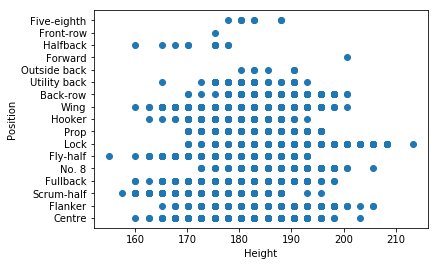

In [34]:
x = new_data['Position']
y = new_data['Height']
plt.ylabel('Position')
plt.xlabel('Height')

plt.scatter(y,x)

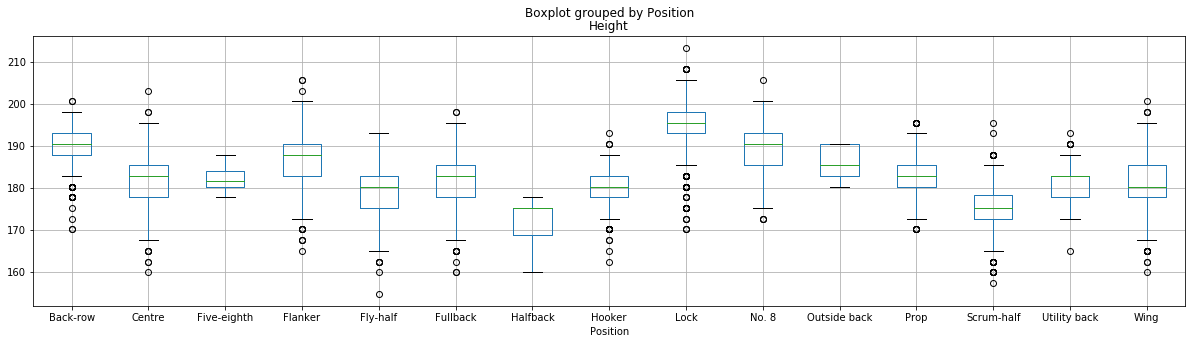

In [57]:
new_data.boxplot(column='Height',by='Position',figsize=(20,5))


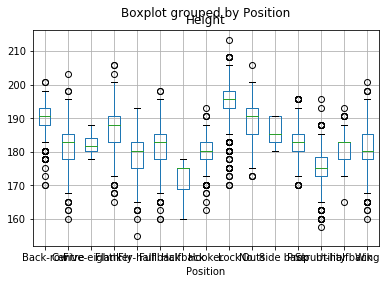

In [62]:
new_data.boxplot(column='Height',by='Position')

In [49]:
result = data[data['name'].str.contains('George Ford')]
result.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
3603,George Ford,"March 16, 1993, Oldham",5,Fly-half,49,39,10,220.0,6,38,36,2,73.46,177.8,85.728958,2014,1993


In [50]:
result = data[data['name'].str.contains('Maro Itoje')]
result.head()

,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight,SpanStart,BornYear
3617,Maro Itoje,"October 28, 1994, Camden",3,"Lock, Back-row",27,24,3,5.0,1,0,0,0,68.51,195.58,117.026831,2016,1994


In [36]:
new_data =  new_data[['name', 'Born','Span','Position','Mat','Start','Sub','Pts','Tries','Conv','Pens','Drop','%','Height','Weight']]


In [43]:
temp = new_data.query('Position == "Lock"')
temp = temp.sort_values('Mat', ascending=False)
temp.head(10)


,name,Born,Span,Position,Mat,Start,Sub,Pts,Tries,Conv,Pens,Drop,%,Height,Weight
4591,Alun Wyn Jones,"September 19, 1985, Swansea",13.0,Lock,128.0,116.0,12.0,45.0,9.0,0.0,0.0,0.0,48.43,195.58,117.934016
4198,Victor Matfield,"May 11, 1977, Pietersburg",15.0,Lock,127.0,121.0,6.0,35.0,7.0,0.0,0.0,0.0,62.99,200.66,109.769354
2186,Fabien Pelous,"December 7, 1973, Toulouse",13.0,Lock,118.0,106.0,12.0,40.0,8.0,0.0,0.0,0.0,67.37,198.12,109.769354
443,Nathan Sharpe,"February 26, 1978, Wagga Wagga, NSW",11.0,Lock,116.0,109.0,7.0,40.0,8.0,0.0,0.0,0.0,61.20,200.66,114.758870
2581,Paul O'Connell,"October 20, 1979, Limerick",14.0,Lock,115.0,106.0,9.0,40.0,8.0,0.0,0.0,0.0,60.86,198.12,111.583723
2874,Marco Bortolami,"June 12, 1980, Padova",15.0,Lock,112.0,92.0,20.0,35.0,7.0,0.0,0.0,0.0,26.33,195.58,111.583723
3643,Sam Whitelock,"October 12, 1988, Palmerston North",9.0,Lock,107.0,88.0,19.0,25.0,5.0,0.0,0.0,0.0,90.18,203.20,119.748386
5459,Goncalo Uva,"October 3, 1984, Lisboa",15.0,Lock,101.0,95.0,6.0,45.0,9.0,0.0,0.0,0.0,42.07,200.66,107.954984
3169,Hitoshi Ono,"May 6, 1978, Koriyama",13.0,Lock,98.0,78.0,20.0,65.0,13.0,0.0,0.0,0.0,62.75,193.04,104.779837
2585,Donncha O'Callaghan,"March 24, 1979, Cork",11.0,Lock,98.0,70.0,28.0,5.0,1.0,0.0,0.0,0.0,56.12,195.58,114.758870
